<a href="https://colab.research.google.com/github/Aman7Rathore/BOOK_Recommendor/blob/main/BOOK_Recommendation_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
books = pd.read_csv('/content/drive/MyDrive/Capstone_Project(4)/Books.csv')
users = pd.read_csv('/content/drive/MyDrive/Capstone_Project(4)/Users.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Capstone_Project(4)/Ratings.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [21]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['User-ID', 'ISBN', 'Book-Rating']


**Ratings Distribution**

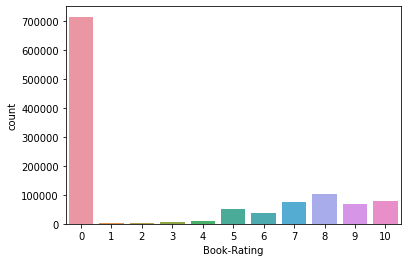

In [22]:
sns.countplot(x='Book-Rating',data=ratings)

plt.show()

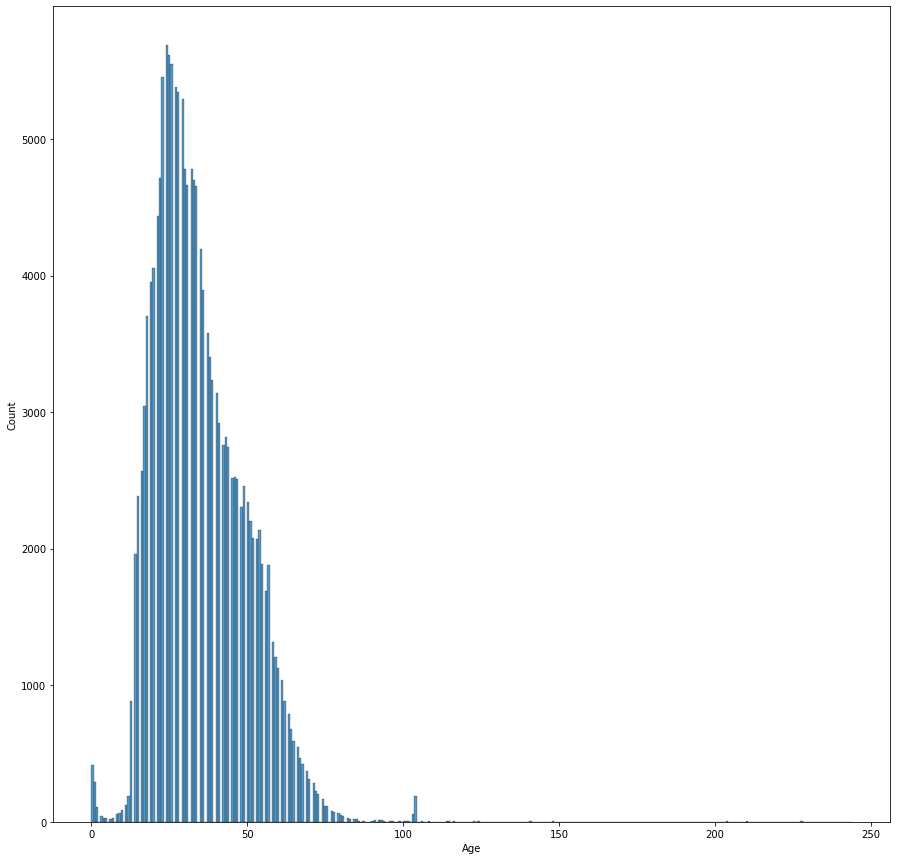

In [53]:
plt.figure(figsize=(15,15))
sns.histplot(x='Age',data=users)

In [23]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


In [24]:
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Recommendations based on rating counts


In [36]:
ratings['User-ID'].value_counts()


11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
225595      200
83671       200
252827      200
36554       200
99955       200
Name: User-ID, Length: 905, dtype: int64

In [37]:
x = ratings['User-ID'].value_counts() > 200
y = x[x].index  #user_ids
print(y.shape)
ratings = ratings[ratings['User-ID'].isin(y)]

(899,)


In [38]:
rating_with_books = ratings.merge(books, on='ISBN')
rating_with_books.head()


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [42]:
number_rating = rating_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()
number_rating.rename(columns= {'Book-Rating':'number_of_ratings'}, inplace=True)
final_rating = rating_with_books.merge(number_rating, on='Book-Title')
final_rating.shape
final_rating = final_rating[final_rating['number_of_ratings'] >= 50]


In [44]:
book_pivot = final_rating.pivot_table(columns='User-ID', index='Book-Title', values="Book-Rating")
book_pivot.fillna(0, inplace=True)

In [45]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [46]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute',metric='cosine')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [47]:
distances, suggestions = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1))

In [48]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))',
       'Harry Potter and the Sorcerer's Stone (Book 1)'],
      dtype='object', name='Book-Title')
